In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('/home/sha/data/titanic/titanic_data.csv')
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

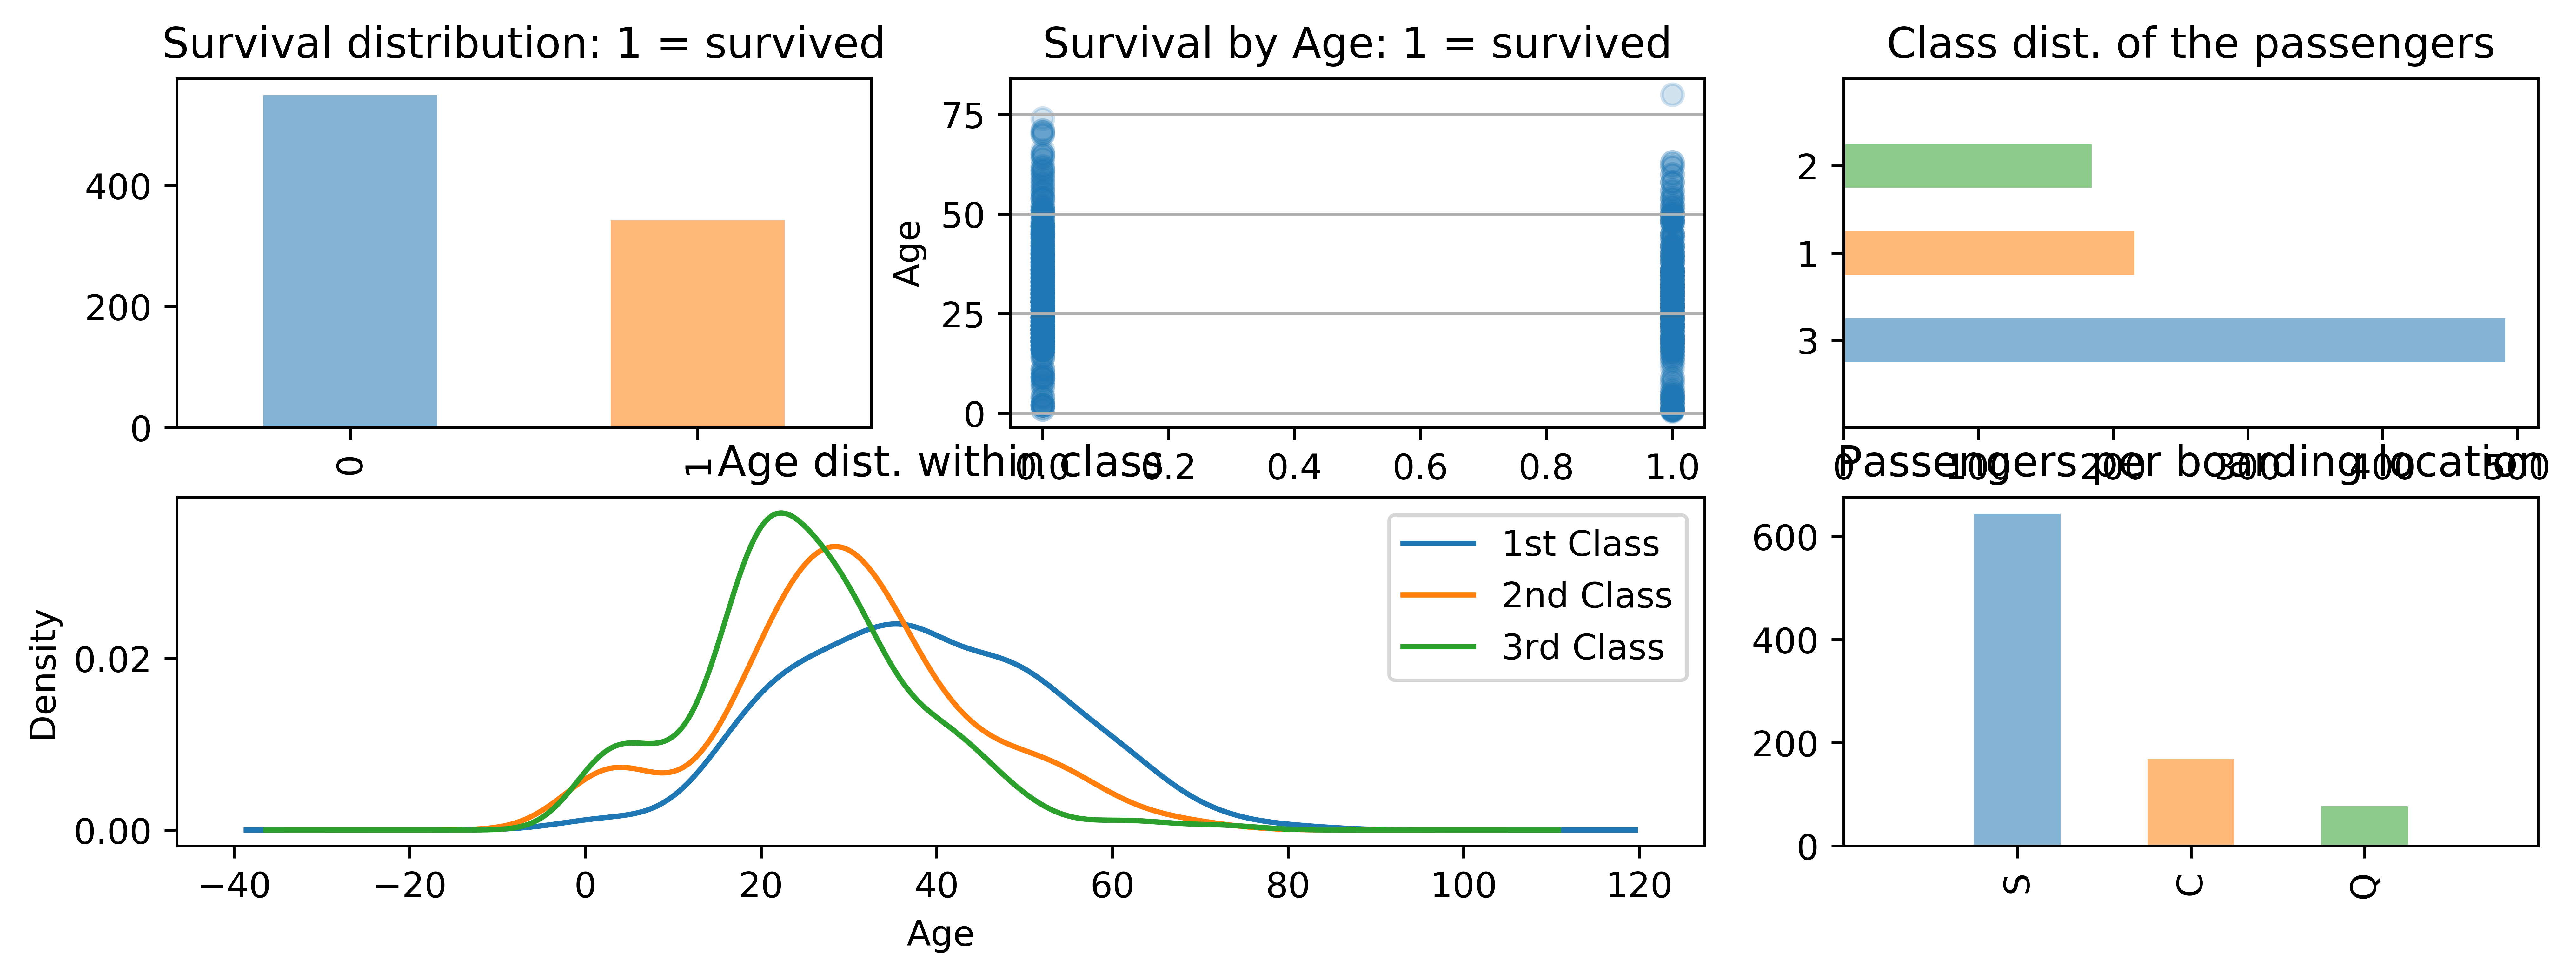

In [3]:
fig = plt.figure(figsize=(12, 4), dpi=800)
alpha = alpha_scatterplot = 0.2
alpha_bar_chart = 0.55
# fig = plt.figure()
ax = fig.add_subplot(111)

# A bar diagram for showing who survived vs whose not
ax1 = plt.subplot2grid((2,3),(0,0))
ax1.set_xlim(-1, 2)
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
plt.title("Survival distribution: 1 = survived")

plt.subplot2grid((2,3), (0,1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
plt.ylabel('Age')
plt.grid(b=True, which='major', axis='y')
plt.title('Survival by Age: 1 = survived')

ax3 = plt.subplot2grid((2,3), (0,2))
df.Pclass.value_counts().plot(kind='barh', alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(df.Pclass.value_counts()))
plt.title('Class dist. of the passengers')

plt.subplot2grid((2,3), (1,0), colspan=2)
df.Age[df.Pclass == 1].plot(kind='kde')
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
plt.xlabel('Age')
plt.title('Age dist. within class')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

ax5 = plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(df.Embarked.value_counts()))
plt.title("Passengers per boarding location")

plt.show()

In [4]:
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [5]:
with tf.Session() as sess:
    x = tf.placeholder(tf.float32, name='x')
    y = tf.placeholder(tf.float32, name='y')
    z = tf.multiply(x, y)
    z_output = sess.run(z, feed_dict={x: 8, y: 9})
sess.close()
print(z_output)

72.0


In [6]:
scalar = tf.constant(100)
vector = tf.constant([1,2,3,4,5])
matrix = tf.constant([[1,2,3], [4,5,6]])
cube_matrix = tf.constant([[[1], [2], [3]], [[4], [5], [6]], [[7], [8], [9]]])
print(scalar.get_shape())
print(vector.get_shape())
print(matrix.get_shape())
print(cube_matrix.get_shape())

()
(5,)
(2, 3)
(3, 3, 1)


In [7]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [11]:
a = 3
b = 2
x = tf.placeholder(tf.float32, shape=(a, b))
y = tf.add(x, x)

data = np.random.rand(a, b)
sess = tf.Session()
print(sess.run(y, feed_dict={x: data}))
sess.close()

[[0.5797529  0.40290797]
 [1.6254836  0.0131616 ]
 [1.5434529  0.32361484]]


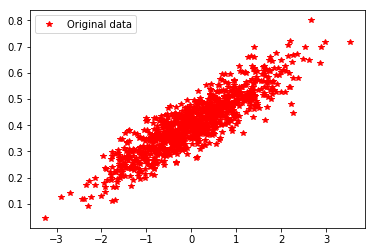

In [12]:
ops.reset_default_graph()
# Create 1000 points following a function y=0.1*x + 0.4 with some normal random distribution
num_points = 1000
vectors_set = []
for i in range(num_points):
    W = 0.1
    b = 0.4
    x1 = np.random.normal(0.0, 1.0)
    nd = np.random.normal(0.0, 0.05)
    y1 = W * x1 + b
    # Add some impurity with some normal distribution -i.e. nd:
    y1 = y1 + nd
    # Append them and create a combined vector set:
    vectors_set.append([x1, y1])
# Separate the data point across axieses:
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

# Plot and show the data points in a 2D space
plt.plot(x_data, y_data, 'r*', label='Original data')
plt.legend()
plt.show()

In [13]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.6)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(16):
    sess.run(train)
    print(i, sess.run(W), sess.run(b), sess.run(loss))

0 [0.21117067] [0.5109505] 0.02769183
1 [0.07417098] [0.37580374] 0.0038650397
2 [0.10273484] [0.40930936] 0.0026221664
3 [0.09652752] [0.40125796] 0.0025559755
4 [0.09791286] [0.40316167] 0.002552427
5 [0.09759863] [0.40271544] 0.0025522357
6 [0.09767059] [0.40281954] 0.0025522255
7 [0.09765403] [0.4027953] 0.0025522253
8 [0.09765785] [0.40280095] 0.002552225
9 [0.09765697] [0.40279964] 0.002552225
10 [0.09765717] [0.40279993] 0.002552225
11 [0.09765712] [0.40279987] 0.002552225
12 [0.09765714] [0.40279987] 0.002552225
13 [0.09765714] [0.40279987] 0.002552225
14 [0.09765714] [0.40279987] 0.002552225
15 [0.09765714] [0.40279987] 0.002552225


In [ ]:
with tf.name_scope('LinearRegression') as scope:
    W = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='Weidhts')
    b = tf.Variable(tf.zeros([1]))
    y = W * x_data + b
with tf.name_scope('LossFunction') as scope:
    loss = tf.reduce_mean(tf.square(y - y_data))
loss_summary = tf.summary.scalar('loss', loss)
w_ = tf.summary.histogram('W', W)
b_ = tf.summary.histogram('b', b)
merged_op = tf.summary.merge_all()
writer_tensorboard = tf.summary.FileWriter('/home/sha/tmp/tensorboard/', sess.graph_def)
